# Insights in data

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import statsmodels
import folium

# Custom imports
from ipywidgets import IntProgress
from IPython.display import display
import time
from multiprocessing import Pool, Lock
import os
import json
import seaborn as sns

In [3]:
dataLands = pd.read_csv("./data/fao_data_land_data.csv")
print(dataLands)
dataLands["category"].value_counts()

       country_or_area                                       element_code  \
0          Afghanistan                                                 11   
1          Afghanistan                                                 11   
2          Afghanistan                                                 11   
3          Afghanistan                                                 11   
4          Afghanistan                                                 11   
...                ...                                                ...   
104779              A   May include official, semi-official or estimat...   
104780              F                                        FAO Estimate   
104781              Q   Official data reported on FAO Questionnaires f...   
104782              Fm                                  Manual Estimation   
104783              I   Country data reported by International Organiz...   

       element    year     unit    value value_footnotes  \
0         Area 

land_area                               11425
country_area                            11424
agricultural_area                       11162
arable_land_and_permanent_crops         11013
arable_land                             10966
permanent_meadows_and_pastures          10348
permanent_crops                         10125
total_area_equipped_for_irrigation       8841
inland_water                             8189
forest_area                              4595
other_land                               4466
fallow_land                               425
agricultural_area_irrigated               323
temporary_crops                           317
perm_meadows_pastures_nat_grown           169
temporary_meadows_and_pastures            156
temp_crops_irrigated                      155
temp_crops_non_irrigated                  154
perm_crops_irrigated                      150
perm_crops_non_irrigated                  148
perm_meadows_pastures_cultivated          145
perm_meadows_pastures_cult_irrig  

In [4]:
dataLands["category"].where(dataLands["country_or_area"] == "Iran, Islamic Republic of" ).value_counts()

land_area                             47
country_area                          47
permanent_meadows_and_pastures        47
arable_land_and_permanent_crops       47
agricultural_area                     47
total_area_equipped_for_irrigation    47
inland_water                          47
arable_land                           47
permanent_crops                       47
other_land                            18
forest_area                           18
temp_crops_irrigated                   7
temp_crops_non_irrigated               7
temporary_crops                        7
perm_crops_irrigated                   7
perm_crops_non_irrigated               7
agricultural_area_irrigated            7
fallow_land                            7
perm_meadows_pastures_cultivated       7
perm_meadows_pastures_nat_grown        7
Name: category, dtype: int64

In [3]:
countryURL = "https://raw.githubusercontent.com/deldersveld/topojson/master/world-countries.json"

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = countryURL
state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'
state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[48, -102], zoom_start=3)

#folium.Choropleth(
#    geo_data=state_geo,
#    name='choropleth',
#    data=state_data,
#    columns=['State', 'Unemployment'],
#    key_on='feature.id',
#    fill_color='YlGn',
#    fill_opacity=0.7,
#    line_opacity=0.2,
#    legend_name='Unemployment Rate (%)'
#).add_to(m)


folium.TopoJson(json.loads(requests.get(countryURL).text),
               'objects.countries1',
                name='topojson').add_to(m)

folium.LayerControl().add_to(m)

m


In [6]:
dataFertilizers = pd.read_csv("./data/fao_data_fertilizers_data.csv")
dataFertilizers

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
0,Americas +,11,Stocks,2007.0,Head,3100.0,A,animals_live_nes
1,Americas +,11,Stocks,2006.0,Head,3100.0,A,animals_live_nes
2,Americas +,11,Stocks,2005.0,Head,3100.0,A,animals_live_nes
3,Americas +,11,Stocks,2004.0,Head,3100.0,A,animals_live_nes
4,Americas +,11,Stocks,2003.0,Head,3100.0,A,animals_live_nes
...,...,...,...,...,...,...,...,...
102199,fnSeqID,Footnote,NaN,NaN,NaN,NaN,NaN,turkeys
102200,A,"May include official, semi-official or estimat...",NaN,NaN,NaN,NaN,NaN,turkeys
102201,NR,Not reported by country,NaN,NaN,NaN,NaN,NaN,turkeys
102202,F,FAO Estimate,NaN,NaN,NaN,NaN,NaN,turkeys


In [7]:
dataFertilizers["category"].value_counts()

cattle                    10767
chickens                  10673
goats                     10311
pigs                       9953
sheep                      9874
horses                     9248
asses                      7239
beehives                   6866
ducks                      6008
mules                      5356
turkeys                    4882
geese_and_guinea_fowls     3579
buffaloes                  3076
camels                     2905
animals_live_nes            803
other_rodents               332
other_camelids              332
Name: category, dtype: int64

In [8]:
dataPesticides = pd.read_csv("./data/current_FAO/raw_files/Environment_Pesticides_E_All_Data_(Normalized).csv", encoding="cp1252")
dataPesticides

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,3,Albania,1357,Pesticides,5159,Average use per area of cropland,1993,1993,kg/ha,0.17,Fc
1,3,Albania,1357,Pesticides,5159,Average use per area of cropland,1994,1994,kg/ha,0.29,Fc
2,3,Albania,1357,Pesticides,5159,Average use per area of cropland,1995,1995,kg/ha,0.36,Fc
3,4,Algeria,1357,Pesticides,5159,Average use per area of cropland,1990,1990,kg/ha,1.30,Fc
4,4,Algeria,1357,Pesticides,5159,Average use per area of cropland,1991,1991,kg/ha,1.74,Fc
...,...,...,...,...,...,...,...,...,...,...,...
2280,181,Zimbabwe,1357,Pesticides,5159,Average use per area of cropland,1997,1997,kg/ha,0.77,Fc
2281,181,Zimbabwe,1357,Pesticides,5159,Average use per area of cropland,1998,1998,kg/ha,0.82,Fc
2282,181,Zimbabwe,1357,Pesticides,5159,Average use per area of cropland,2012,2012,kg/ha,0.82,Fc
2283,181,Zimbabwe,1357,Pesticides,5159,Average use per area of cropland,2013,2013,kg/ha,0.62,Fc


## Show of the main datas

In [18]:
dataLands

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
0,Afghanistan,11,Area,2007.0,1000 Ha,38661.0,Q,agricultural_area
1,Afghanistan,11,Area,2006.0,1000 Ha,38659.0,Fm,agricultural_area
2,Afghanistan,11,Area,2005.0,1000 Ha,38515.0,Fm,agricultural_area
3,Afghanistan,11,Area,2004.0,1000 Ha,38064.0,Fm,agricultural_area
4,Afghanistan,11,Area,2003.0,1000 Ha,38899.0,Fm,agricultural_area
...,...,...,...,...,...,...,...,...
104779,A,"May include official, semi-official or estimat...",NaN,NaN,NaN,NaN,NaN,total_area_equipped_for_irrigation
104780,F,FAO Estimate,NaN,NaN,NaN,NaN,NaN,total_area_equipped_for_irrigation
104781,Q,Official data reported on FAO Questionnaires f...,NaN,NaN,NaN,NaN,NaN,total_area_equipped_for_irrigation
104782,Fm,Manual Estimation,NaN,NaN,NaN,NaN,NaN,total_area_equipped_for_irrigation


In [11]:
dataFertilizers

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
0,Americas +,11,Stocks,2007.0,Head,3100.0,A,animals_live_nes
1,Americas +,11,Stocks,2006.0,Head,3100.0,A,animals_live_nes
2,Americas +,11,Stocks,2005.0,Head,3100.0,A,animals_live_nes
3,Americas +,11,Stocks,2004.0,Head,3100.0,A,animals_live_nes
4,Americas +,11,Stocks,2003.0,Head,3100.0,A,animals_live_nes
...,...,...,...,...,...,...,...,...
102199,fnSeqID,Footnote,NaN,NaN,NaN,NaN,NaN,turkeys
102200,A,"May include official, semi-official or estimat...",NaN,NaN,NaN,NaN,NaN,turkeys
102201,NR,Not reported by country,NaN,NaN,NaN,NaN,NaN,turkeys
102202,F,FAO Estimate,NaN,NaN,NaN,NaN,NaN,turkeys


In [12]:
dataCrops = pd.read_csv("./data/fao_data_crops_data.csv")
dataCrops

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
0,Americas +,31,Area Harvested,2007.0,Ha,49404.0,A,agave_fibres_nes
1,Americas +,31,Area Harvested,2006.0,Ha,49404.0,A,agave_fibres_nes
2,Americas +,31,Area Harvested,2005.0,Ha,49404.0,A,agave_fibres_nes
3,Americas +,31,Area Harvested,2004.0,Ha,49113.0,A,agave_fibres_nes
4,Americas +,31,Area Harvested,2003.0,Ha,48559.0,A,agave_fibres_nes
...,...,...,...,...,...,...,...,...
2255344,Fc,Calculated Data,NaN,NaN,NaN,NaN,NaN,yautia_cocoyam
2255345,A,"May include official, semi-official or estimat...",NaN,NaN,NaN,NaN,NaN,yautia_cocoyam
2255346,NR,Not reported by country,NaN,NaN,NaN,NaN,NaN,yautia_cocoyam
2255347,F,FAO Estimate,NaN,NaN,NaN,NaN,NaN,yautia_cocoyam


In [17]:
dataForest = pd.read_csv("./data/fao_data_forest_data.csv")
dataForest.describe()

,year,value
count,1.364725e+06,1.364725e+06
mean,1.990159e+03,3.277691e+06
std,1.372468e+01,3.868696e+07
min,1.961000e+03,-2.538700e+04
25%,1.979000e+03,2.010000e+02
50%,1.994000e+03,9.532000e+03
75%,2.002000e+03,1.700000e+05
max,2.007000e+03,3.591409e+09


In [15]:
dataProduction = pd.read_csv("./data/fao_data_production_indices_data.csv")
dataProduction

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
0,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2007.0,1000 Int. $,2486910.0,A,agriculture_pin
1,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2006.0,1000 Int. $,2278516.0,A,agriculture_pin
2,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2005.0,1000 Int. $,2524097.0,A,agriculture_pin
3,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2004.0,1000 Int. $,2226346.0,A,agriculture_pin
4,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2003.0,1000 Int. $,2289434.0,A,agriculture_pin
...,...,...,...,...,...,...,...,...
311629,Zimbabwe,438,Net per capita PIN (base 1999-2001),1963.0,Int. $,81.0,A,non_food_pin
311630,Zimbabwe,438,Net per capita PIN (base 1999-2001),1962.0,Int. $,98.0,A,non_food_pin
311631,Zimbabwe,438,Net per capita PIN (base 1999-2001),1961.0,Int. $,103.0,A,non_food_pin
311632,fnSeqID,Footnote,NaN,NaN,NaN,NaN,NaN,non_food_pin


In [20]:
dataLands = dataLands.dropna(subset=["element"])

In [31]:
dataLands2007 = dataLands.where(dataLands["year"] == 2007).where(dataLands["category"] == "agricultural_area")

In [32]:
dataLands2007["unit"].unique()

array(['1000 Ha', nan], dtype=object)

In [33]:
dataLands2007.sort_values("value",ascending=False).head(50)

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
10935,World +,11,Area,2007.0,1000 Ha,4931862.0,A,agricultural_area
5659,Low Income Food Deficit Countries +,11,Area,2007.0,1000 Ha,2074017.4,A,agricultural_area
533,Asia +,11,Area,2007.0,1000 Ha,1662868.7,A,agricultural_area
235,Americas +,11,Area,2007.0,1000 Ha,1197258.0,A,agricultural_area
6745,Net Food Importing Developing Countries +,11,Area,2007.0,1000 Ha,1166849.6,A,agricultural_area
47,Africa +,11,Area,2007.0,1000 Ha,1157486.3,A,agricultural_area
5361,Least Developed Countries +,11,Area,2007.0,1000 Ha,803973.3,A,agricultural_area
5251,LandLocked developing countries +,11,Area,2007.0,1000 Ha,787722.1,A,agricultural_area
2869,Eastern Asia +,11,Area,2007.0,1000 Ha,678368.0,A,agricultural_area
9085,South America +,11,Area,2007.0,1000 Ha,580185.0,A,agricultural_area


In [66]:
def cond_countries(dataLands):
    countries = ["Asia +","Europe +", "Americas +", "Oceania +", "Africa +"]
    truthTable = (dataLands["country_or_area"] == countries[0])
    print(truthTable)
    for c in countries:
        truthTable = (dataLands["country_or_area"] == c) | truthTable
    return truthTable

dataLandsContinent = dataLands.where(dataLands["category"] == "agricultural_area")\
                                .where(cond_countries(dataLands))\
                                .dropna(subset=["country_or_area"])\
                                .sort_values("value",ascending=False)
#dataLandsContinent

0         False
1         False
2         False
3         False
4         False
          ...  
104771    False
104772    False
104773    False
104774    False
104775    False
Name: country_or_area, Length: 104659, dtype: bool


/home/jeremy/miniconda3/envs/ada-2019/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


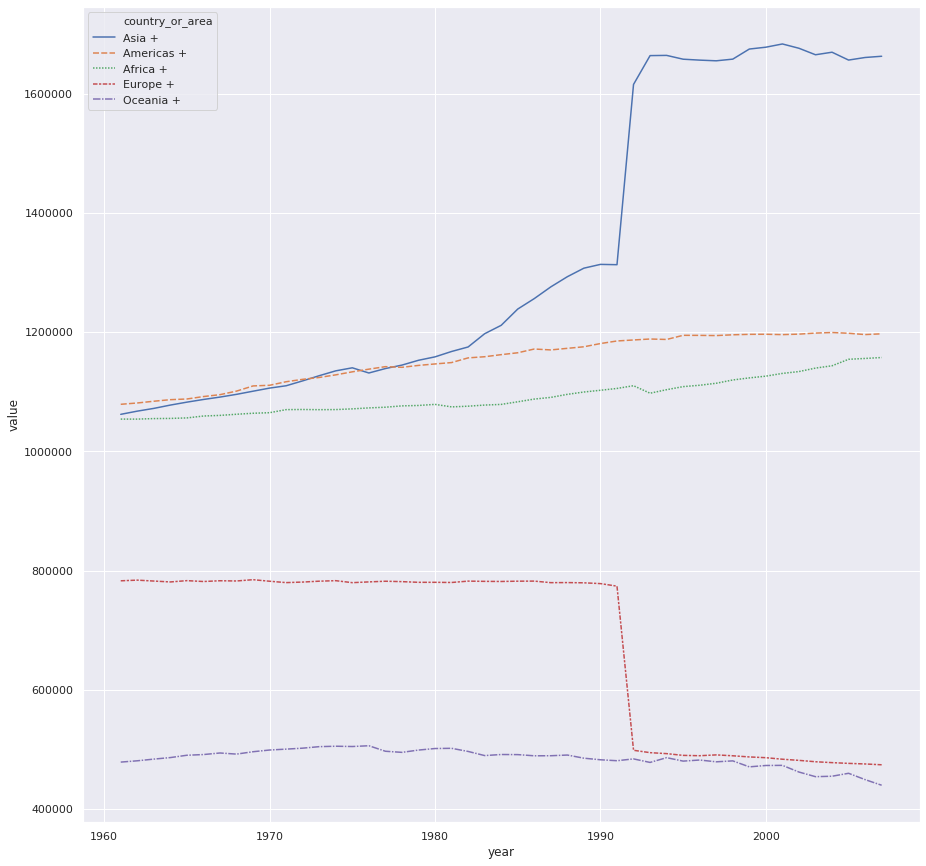

In [80]:
sns.set(style="darkgrid")

fg = plt.figure(figsize=(15,15))
axes = fg.add_subplot()
# Plot the responses for different events and regions
sns.lineplot(x="year", y="value", style="country_or_area", data=dataLandsContinent, hue="country_or_area", ax=axes)

fg.show()